# Задание 14

Пусть $x_n$ и $y_m$ - независимые случайные выборки из нормального распределения с параметрами $a$, $\sigma_x^2 = 2$ и $b$, $\sigma_y^2 = 1$ соответственно. Используя реализации случайных выборок: $x = \{-1.11, -6.10, 2.42\}$, $y = \{-2.29, -2.91\}$, проверить гипотезу о равенстве средних против альтернатив $a > b$. Построить график мощности критерия.

In [1]:
import numpy as np

x = np.array([-1.11, -6.10, 2.42])
y = np.array([-2.29, -2.91])

In [2]:
# Количество повторений бутстрапа
n_iterations = 1000
beta = 0.95


h_wave = np.mean(x) - np.mean(y)

bootstrap_delta = []

for _ in range(n_iterations):
    sample_x = np.random.choice(x, size=len(x))
    sample_y = np.random.choice(y, size=len(y))
    bootstrap_delta.append(np.mean(sample_x) - np.mean(sample_y) - h_wave)

variation_row = sorted(bootstrap_delta)

delta_ = variation_row[int((1 - beta) * n_iterations)]


upper_bound = h_wave - delta_

print(f"Доверительный интервал: (-infinity, {upper_bound})")
print(f"Значение: {h_wave}")


Доверительный интервал: (-infinity, 4.153333333333333)
Значение: 1.0033333333333334


## Нет оснований отвергнуть гипотезу $H_0$

## $\theta = a - b$

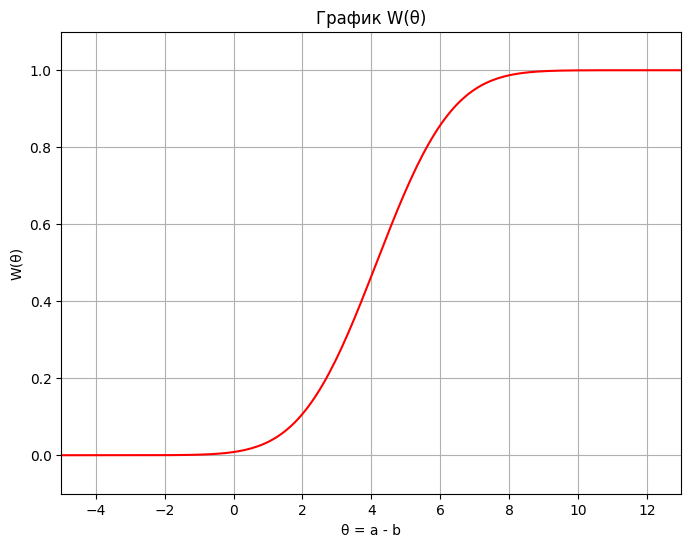

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

s = np.sqrt(2 + 1)
a = 4.153

def W(theta):
  return 1 - norm.cdf(a, loc=theta, scale=s)

theta_values = np.linspace(-5, 13, 200)

F_values = [W(theta) for theta in theta_values]

plt.figure(figsize=(8, 6))
plt.plot(theta_values, F_values, color='red')
plt.xlabel("θ = a - b")
plt.ylabel("W(θ)")
plt.title("График W(θ)")
plt.grid(True)
plt.xlim(-5, 13)
plt.ylim(-0.1, 1.1)
plt.show()
